In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.ntheory.residue_ntheory import n_order as order

%cd /home/simone/Desktop/DSSC/tirocinio/results/allY_arbitrary
from total import *
%cd ..

/home/simone/Desktop/DSSC/tirocinio/results/allY_arbitrary
/home/simone/Desktop/DSSC/tirocinio/results


In [2]:
N = [15, 21, 33, 35, 39, 45, 51, 55, 57, 63, 65, 69, 75, 77, 85, 87, 
     91, 93, 95, 99, 105, 111, 115, 117, 119, 123,129]

In [3]:
entropies = [S_15, S_21, S_33, S_35, S_39, S_45, S_51, S_55, S_57, S_63, S_65, S_69, 
             S_75, S_77, S_85, S_87, S_91, S_93, S_95, S_99, S_105, S_111, S_115, 
             S_117, S_119, S_123,S_129]

Y = [Y_15, Y_21, Y_33, Y_35, Y_39, Y_45, Y_51, Y_55, Y_57, Y_63, Y_65, Y_69, 
     Y_75, Y_77, Y_85, Y_87, Y_91, Y_93, Y_95, Y_99, Y_105, Y_111, Y_115, 
     Y_117, Y_119, Y_123,Y_129]

print(S_95[9] - S_111[7])

-0.26071278032069944


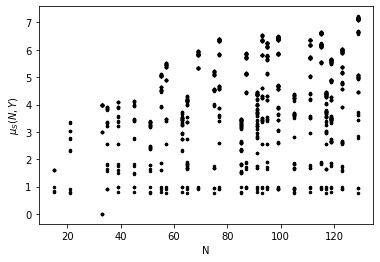

In [4]:
idx_max = []

for i in range(len(entropies)):
    size = len(entropies[i])
    plt.plot([N[i]]*size, entropies[i], 'k.', markersize=5)
    idx_max.append(np.argmax(entropies[i]))

plt.xlabel("N")
plt.ylabel("$\mu_S(N,Y)$")
#plt.savefig('scatterplot_arbitrary',dpi=300)
plt.show()

## $\mu_S(N,step)$ for abitrary

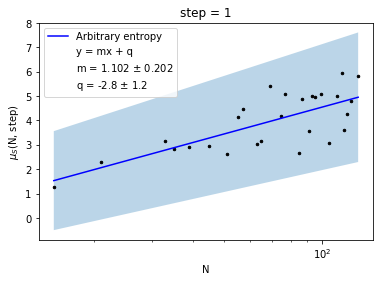

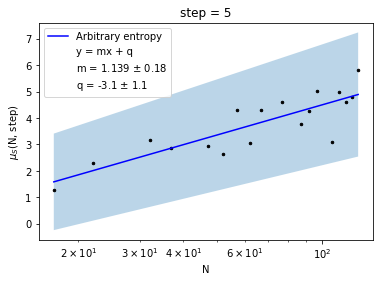

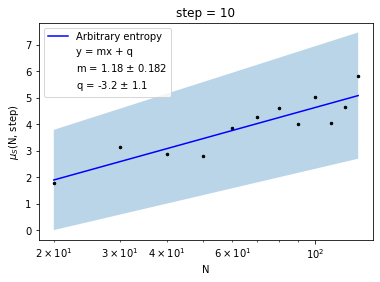

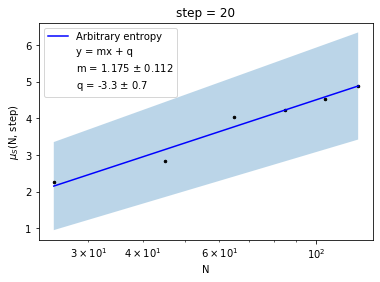

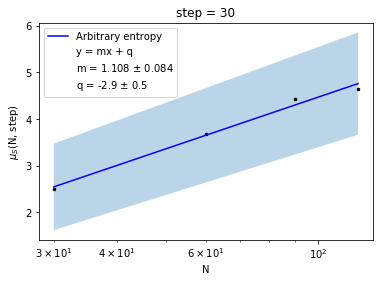

In [8]:
from scipy.optimize import curve_fit

def find_first(x):
    idx, step = 0, 32
    while idx < x.size:
        nz, = x[idx: idx + step].nonzero()
        if len(nz): # found non-zero, return it
            return nz[0] + idx
        # move to the next chunk, increase step
        idx += step
        step = min(9600, step + step // 2)
    return -1

def find_first_value_greater_than(x: np.array, value: float) -> float:
    rescaled = x - value
    bool_array = rescaled * (rescaled>0)
    idx_first_nonzero_in_rescaled = find_first(bool_array)
    return x[idx_first_nonzero_in_rescaled]

def get_std_error(x,y, regressor):
    N = len(x)
    p = x.shape[1]+1
    
    X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = x
    
    y_pred = regressor.predict(x)
    m = regressor.coef_[0][0]
    q = regressor.intercept_[0]
    
    residuals = y - y_pred
    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
    
    for p_ in range(p):
        standard_error = var_beta_hat[p_, p_] ** 0.5
        if p_ ==0 : print("m = " +str(m) + ", std_Dev = " + str(standard_error))
        else: print("q = " + str(q)+ ", std_Dev = " + str(standard_error))
    return np.sqrt(diag(var_beta_hat))

def f(x,m,q):
    return m*x+q


x = np.array(N)
y = np.array([np.mean(e) for e in entropies]) #y[i] = mean over Y of S(N[i],Y)

means = []
for step in [1,5,10,20,30]:
    idx = ([np.nonzero(np.logical_and(j<=x, x<j+step)) for j in range(x[0], x[-1]+1, step)])
    means = [np.mean(y[i]) for i in idx]
    medium_points = np.array(range(x[0]+ step//2,x[-1]+1+step//2,step))
    
    plt.semilogx(medium_points, means, 'k.', color='black', markersize=5)
    plt.title('step = ' + str(step))
    plt.xlabel('N')
    plt.ylabel('$\mu_S$(N, step)')    
    
    nan_idx = np.argwhere(np.isnan(means)).flatten()
    x_reg = np.delete(np.log2(medium_points),nan_idx)
    y_reg = np.delete(means,nan_idx)
    params, pcov = curve_fit(f,x_reg, y_reg)
    perr = np.sqrt(np.diag(pcov))
    y_pred = f(x_reg, params[0], params[1])
    y_down = f(x_reg, params[0]-perr[0], params[1]-perr[1])
    y_up = f(x_reg, params[0]+perr[0], params[1]+perr[1])
    
    plt.plot(np.power(2,x_reg),y_pred, '-', color='blue', label = "Arbitrary entropy") 
    plt.fill_between(np.power(2,x_reg), y_up, y_down, alpha=0.3)
    plt.plot([],[],color= "white", label ="y = mx + q")
    plt.plot([],[],color= "white", label ="m = {} $\pm$ {}".format(round(params[0],3),round(perr[0],3)))
    plt.plot([],[],color= "white", label = "q = {} $\pm$ {}".format(round(params[1],1),round(perr[1],1)))
    
    plt.legend()
    #savefig('registers_average_entropy_'+str(step), dpi=400)
    plt.show()

##  confrontation with registers case

/home/simone/Desktop/DSSC/tirocinio


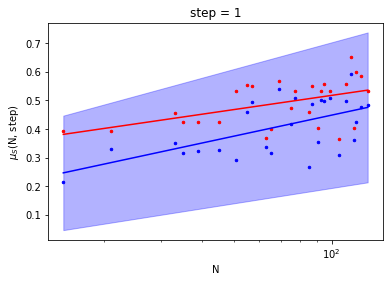

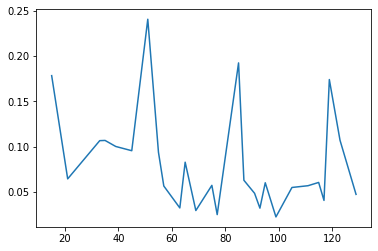

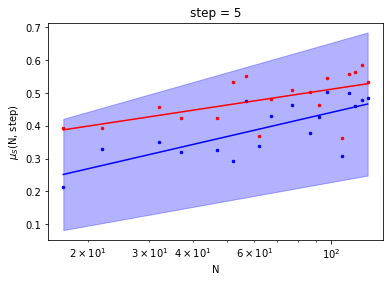

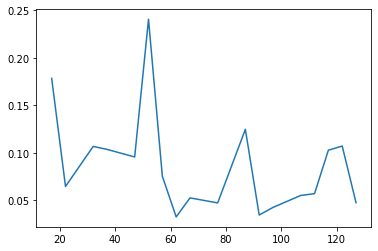

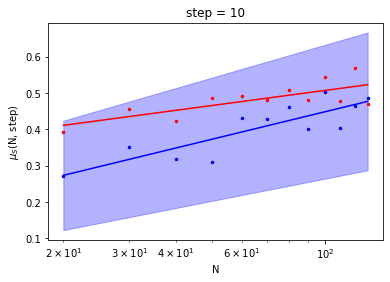

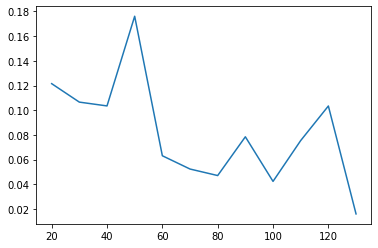

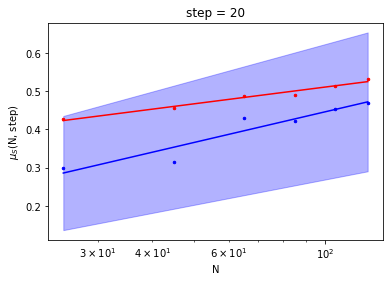

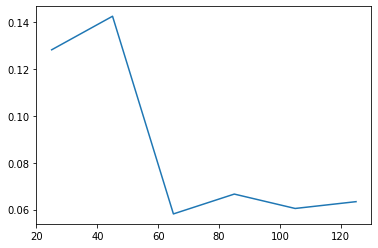

In [9]:
%cd /home/simone/Desktop/DSSC/tirocinio
from math import ceil
import pickle
with open("heatmap_2.txt", "rb") as fp:
    newdata = pickle.load(fp)
    
x_reg=array([x[0] for j in range(len(newdata)) for x in newdata[j]])
y_reg=array([x[2] for j in range(len(newdata)) for x in newdata[j]])


#for qubit
normalize = True
if normalize:
    y_reg = [v / ceil(np.log2(n)) for v,n in zip(y_reg,x_reg)]
    y = np.array([v / (3* ceil(np.log2(n))//2) for v,n in zip(y,x)])

   
uniq = np.unique(x_reg)
for step in [1,5,10,20]:
    idx = ([np.nonzero(np.logical_and(j<=x, x<j+step)) for j in range(x[0], 130, step)])
    means = [np.mean(y[i]) for i in idx]
    medium_points = np.array(range(x[0]+ step//2,130+step//2,step))
    
    bin_edges_idx = []

    for j in range(x_reg[0]-1,129+step,step):
        value = find_first_value_greater_than(uniq, j)
        
        filtered = x_reg - value + 1
        filtered = filtered * (filtered>0)
        bin_edges_idx.append(find_first(filtered))
       
    means_reg = [np.mean(y_reg[bin_edges_idx[i]:bin_edges_idx[i+1]]) for i in range(len(bin_edges_idx)-1)]
    medium_points_reg = np.array(range(x_reg[0] + step//2,130+step//2,step))
    
    plt.semilogx(medium_points_reg, means_reg, 'k.', color='red', markersize=5, label='registers')
    plt.semilogx(medium_points, means, 'k.', color='blue', markersize=5, label='arbitrary')
    plt.title('step = ' + str(step))
    plt.xlabel('N')
    plt.ylabel('$\mu_S$(N, step)')    
    
    #fit registers
    nan_idx = np.argwhere(np.isnan(means_reg)).flatten()
    x_reg_fit = np.delete(np.log2(medium_points_reg),nan_idx)
    y_reg_fit = np.delete(means_reg,nan_idx)
    params, pcov = curve_fit(f,x_reg_fit, y_reg_fit)
    perr = np.sqrt(np.diag(pcov))
    y_pred_reg = f(x_reg_fit, params[0], params[1])
    plt.plot(np.power(2,x_reg_fit),y_pred_reg, '-', color='red') 
    
    #fit arbitrary
    nan_idx = np.argwhere(np.isnan(means)).flatten()
    x_fit = np.delete(np.log2(medium_points),nan_idx)
    y_fit = np.delete(means,nan_idx)
    params, pcov = curve_fit(f,x_fit, y_fit)
    perr = np.sqrt(np.diag(pcov))
    y_pred = f(x_fit, params[0], params[1])
    y_down = f(x_fit, params[0]-perr[0], params[1]-perr[1])
    y_up = f(x_fit, params[0]+perr[0], params[1]+perr[1])
    
    
    plt.plot(np.power(2,x_fit),y_pred, '-', color='blue') 
    plt.fill_between(np.power(2,x_fit), y_up, y_down, color = 'blue', alpha=0.3)
    plt.plot([],[],color= "white", label ="y = mx + q")
    plt.plot([],[],color= "white", label ="m = {} $\pm$ {}".format(round(params[0],3),round(perr[0],3)))
    plt.plot([],[],color= "white", label = "q = {} $\pm$ {}".format(round(params[1],1),round(perr[1],1)))

    #plt.legend()
    #if not normalize:
        #plt.savefig('confront_average_entropy_'+str(step), dpi=400)
    #else:
        #plt.savefig('confront_average_entropy_normalized_'+str(step), dpi=400)
    plt.show()
    
    plt.plot(np.power(2,x_reg_fit),np.abs(y_fit - y_reg_fit))
    plt.show()

## Convex hull by hand

In [ ]:
max_Y = [int(Y[i][j]) for i,j in zip(range(len(Y)),idx_max)]
max_r = [order(max_Y[i],N[i]) for i in range(len(N))]
max_S = [entropies[i][j] for i,j in zip(range(len(Y)),idx_max)]

hull_idx = [0,1,2,7,9,11,-1]
print(max_Y)
print(max_r)

plt.plot(N, max_S, 'd', color='black')

x = []
y = []
for i in hull_idx:
    plt.plot(N[i], max_S[i], 'd', color='red')
    print(N[i], max_S[i],max_r[i])
    x.append(N[i])
    y.append(max_S[i])

print(max_r)
plt.xlabel("N")
plt.ylabel("$\max_Y \,\, \mu_S(N,Y)$")
#plt.savefig('convex_hull_arbitrary', dpi=300)
plt.show()

In [ ]:
import scipy.optimize as opt

def f(x, a, c):
    return a * np.log2(x) + c

params, pcov = opt.curve_fit(f, x, y, p0=[1,1])
perr = np.sqrt(np.diag(pcov))

y_fit = f(x, params[0], params[1])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'd')
ax.plot(x, y_fit, '-')
ax.set_title('Logarithmic fit of convex hull')
params = [str(p)[:5] + " $\pm$ " + str(err)[:5] for p,err in zip(params, perr)]
string ="A $log_2$(N) + B\n A = "+params[0]+"\n B = "+params[1]#+"\n C = "+params[2]   
#\\frac{{{}}}{{1+e^{{-{}(k-{})}}}}".format(a_[:4],c_[:4],d_[:4])
ax.text(70, 4, "$\hat{S}(N)$ = "+string, style='normal', fontsize=15, 
bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.set_xlabel('N')
ax.set_ylabel('$\hat{S}$(N)')

# Visualization
#plt.scatter(2**(x), y)
#plt.plot(2**(x), y_fit, "k--", label="Fit")
#plt.xlabel('N')
#plt.ylabel('$\hat{\mu}_S(N)$')
#plt.plot(np.array([N[i] for i in hull_idx]), m*np.log2(np.array([N[i] for i in hull_idx]))+q, 'o',color='red')

#plt.text(60, 3.5, "$\\hat{S}(N) = $" + str(m)[:4] + " log$_2$(N) " +str(q)[:5], style='normal', fontsize=15, 
#    bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
#plt.title("Logarithmic Fit")
#plt.savefig('failed_logarithmic_fit_hull_arbitrary', dpi=300)